## Ridge regression

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [58]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [59]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường 5,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,1.297950,4,6,5.0,-1.877091,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.832029,4,6,8.0,-1.869076,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,10.400602,4.003590,10.000000,2.236068,0.133147,4,5,6.0,-1.823661,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
3,10.398891,4.009621,10.000000,2.236068,0.133147,4,5,4.0,-1.823661,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,10.399521,4.008289,8.660254,2.236068,-1.031655,4,6,4.0,-1.807632,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


##### Input variables

- Training set

In [60]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,Ward Name_Phường An Hải Bắc,Ward Name_Phường An Hải Tây,Ward Name_Phường An Hải Đông,...,Street Name_đường 5,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,1.297950,4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.832029,4,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,10.400602,4.003590,10.000000,2.236068,0.133147,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
3,10.398891,4.009621,10.000000,2.236068,0.133147,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,10.399521,4.008289,8.660254,2.236068,-1.031655,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


##### Target variables

- Training set

In [61]:
y = df[['Price']]
y.head()

,Price
0,-1.877091
1,-1.869076
2,-1.823661
3,-1.823661
4,-1.807632


##### Divide into 2 training sets and validation sets

 - Split data

In [62]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(2123, 1265) (531, 1265)
(2123, 1) (531, 1)


#### Select Alpha coefficient

In [63]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.32185962449226124
model ridge_0.1, MSE: 0.3051301782299565
model ridge_0.15, MSE: 0.29768392213075917
model ridge_0.2, MSE: 0.29324466386171766
model ridge_0.25, MSE: 0.29023057692512466
model ridge_0.3, MSE: 0.2880464854267816
model ridge_0.35, MSE: 0.28640995460078017
model ridge_0.4, MSE: 0.2851646144187944
model ridge_0.45, MSE: 0.2842139808263357
model ridge_0.5, MSE: 0.28349367163952166
model ridge_0.55, MSE: 0.282958176523843
model ridge_0.6, MSE: 0.2825739061767839
model ridge_0.65, MSE: 0.2823152403210987
model ridge_0.7, MSE: 0.2821621310482028
model ridge_0.75, MSE: 0.2820985700533904
model ridge_0.8, MSE: 0.282111564198788
model ridge_0.85, MSE: 0.28219042520851606
model ridge_0.9, MSE: 0.28232626178944453
model ridge_0.95, MSE: 0.28251160696371325
-----------------------------------------
Best models: ridge_0.95, MSE: 0.28251160696371325


*So with Alpha 0.95 will give the most optimal model*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [64]:
ridge_regression = Ridge(alpha=0.95)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.95)

##### Real estate price prediction

- Prediction on validation set

In [65]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[-5.29711679e-01],
       [ 2.26567988e-02],
       [ 3.40369927e-02],
       [-1.15608411e+00],
       [ 9.41428536e-01],
       [ 8.54893409e-01],
       [-2.46000377e-03],
       [-6.57437391e-01],
       [ 1.86018932e+00],
       [ 1.00372636e+00],
       [ 3.77613304e-01],
       [ 1.10138210e+00],
       [ 1.80839798e+00],
       [-1.07111820e-01],
       [-2.79026220e-02],
       [-4.62601159e-01],
       [ 1.53921441e+00],
       [ 4.05579359e-01],
       [ 1.73710838e+00],
       [ 1.45281844e+00],
       [-1.36044443e+00],
       [ 7.05688804e-01],
       [ 1.03201995e+00],
       [-3.75452134e-01],
       [-5.09880374e-01],
       [ 2.57524386e-01],
       [-2.50580387e-01],
       [-1.13457521e-01],
       [-2.66894497e-01],
       [ 2.34424961e-01],
       [-1.54065311e+00],
       [-1.57137086e-01],
       [ 9.39707645e-01],
       [-1.31986798e+00],
       [ 5.29051895e-01],
       [-6.92131039e-01],
       [ 2.14592924e+00],
       [-8.03066713e-01],
       [ 6.7

- On the train set

In [66]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[ 1.30648797],
       [ 0.67227353],
       [-1.24189367],
       ...,
       [-1.25155508],
       [ 0.49231945],
       [-0.19949225]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [67]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.12182749076189532
R-squared of Ridge Model: 87.95151168129158
MAPE of Ridge Model: Price    88.902018
dtype: float64


- Evaluation on the Validation set

In [68]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.28251160696371325
R-squared of Ridge Model: 70.4289360849605
MAPE of Ridge Model: Price    223.238614
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

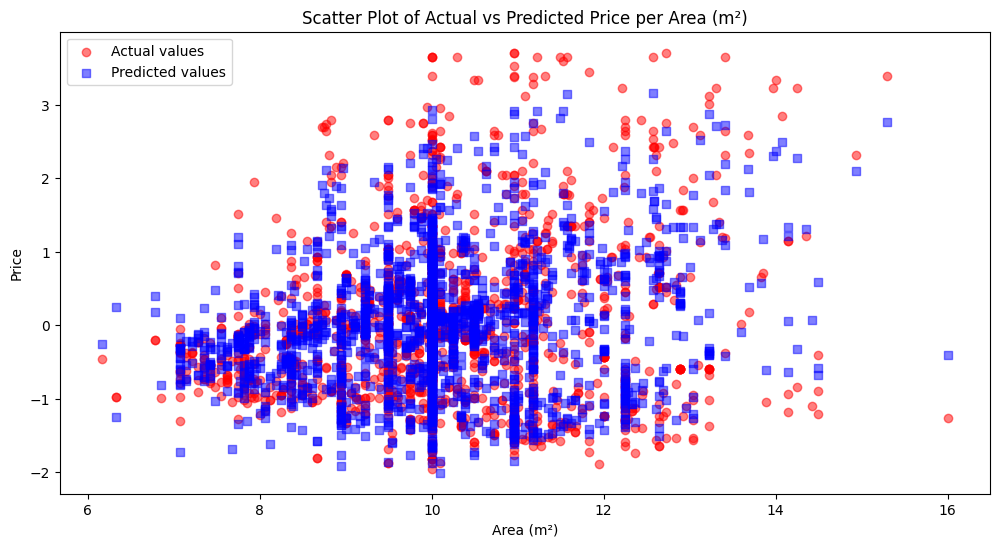

In [69]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

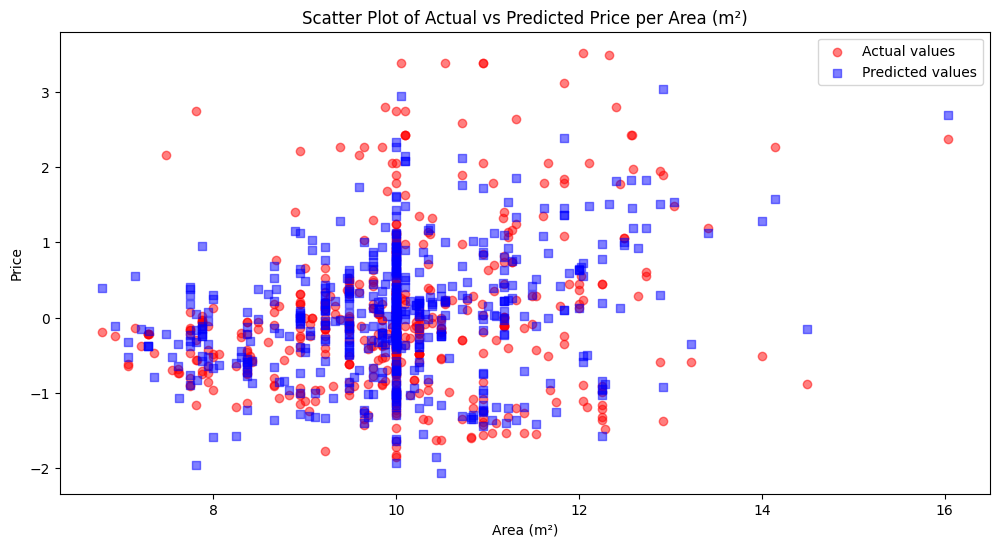

In [70]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>